In [145]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import preprocessing
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error 

In [3]:
df = pd.read_csv("./train.csv")

In [4]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Undersanding the Null values

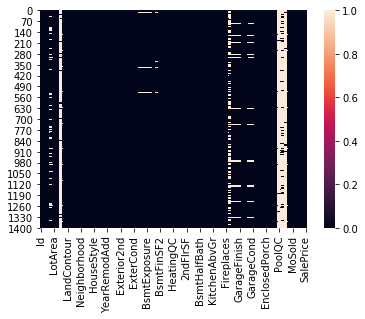

In [5]:
#heatmap of null values
sns.heatmap(df.isnull())

In [6]:
#Columns and number of null values
(pd.DataFrame(df.isnull().sum())).to_dict()[0]

{'Id': 0,
 'MSSubClass': 0,
 'MSZoning': 0,
 'LotFrontage': 259,
 'LotArea': 0,
 'Street': 0,
 'Alley': 1369,
 'LotShape': 0,
 'LandContour': 0,
 'Utilities': 0,
 'LotConfig': 0,
 'LandSlope': 0,
 'Neighborhood': 0,
 'Condition1': 0,
 'Condition2': 0,
 'BldgType': 0,
 'HouseStyle': 0,
 'OverallQual': 0,
 'OverallCond': 0,
 'YearBuilt': 0,
 'YearRemodAdd': 0,
 'RoofStyle': 0,
 'RoofMatl': 0,
 'Exterior1st': 0,
 'Exterior2nd': 0,
 'MasVnrType': 8,
 'MasVnrArea': 8,
 'ExterQual': 0,
 'ExterCond': 0,
 'Foundation': 0,
 'BsmtQual': 37,
 'BsmtCond': 37,
 'BsmtExposure': 38,
 'BsmtFinType1': 37,
 'BsmtFinSF1': 0,
 'BsmtFinType2': 38,
 'BsmtFinSF2': 0,
 'BsmtUnfSF': 0,
 'TotalBsmtSF': 0,
 'Heating': 0,
 'HeatingQC': 0,
 'CentralAir': 0,
 'Electrical': 1,
 '1stFlrSF': 0,
 '2ndFlrSF': 0,
 'LowQualFinSF': 0,
 'GrLivArea': 0,
 'BsmtFullBath': 0,
 'BsmtHalfBath': 0,
 'FullBath': 0,
 'HalfBath': 0,
 'BedroomAbvGr': 0,
 'KitchenAbvGr': 0,
 'KitchenQual': 0,
 'TotRmsAbvGrd': 0,
 'Functional': 0,
 'Fir

# Filling the missing values

In [76]:
df = pd.read_csv("./train.csv")

#filling with null values with mean 
df["LotArea"] = df["LotArea"].fillna(df["LotArea"].mean())
df["LotFrontage"] = df["LotFrontage"].fillna(df["LotFrontage"].mean())
df["MasVnrArea"] = df["MasVnrArea"].fillna(df["MasVnrArea"].mean())

#filling with null values with the most value 
df["BsmtQual"] = df["BsmtQual"].fillna(df["BsmtQual"].mode()[0])
df["BsmtCond"] = df["BsmtCond"].fillna(df["BsmtCond"].mode()[0])
df["Electrical"] = df["Electrical"].fillna(df["Electrical"].mode()[0])

df["FireplaceQu"] = df["FireplaceQu"].fillna(df["FireplaceQu"].mode()[0])

#filling nan values with releveant values
df["GarageType"] = df["GarageType"].fillna("No Garage")
df["GarageFinish"] = df["GarageFinish"].fillna("No Garage")
df["GarageQual"] = df["GarageQual"].fillna("No Garage")
df["GarageCond"] = df["GarageCond"].fillna("No Garage")

df["BsmtExposure"] = df["BsmtExposure"].fillna("No Basement")
df["BsmtFinType1"] = df["BsmtFinType1"].fillna("No Basement")
df["BsmtFinType2"] = df["BsmtFinType2"].fillna("No Basement")


df["Fence"] = df["Fence"].fillna("No Fence")




# Dropping the irrelevant columns

In [77]:
#droping the columns
df.drop(["GarageYrBlt", "Id", "BsmtFinSF2", "Alley", "MasVnrType", 
         "PoolQC", "YearBuilt", "YearRemodAdd", "RoofMatl", "BsmtFinType2"], inplace = True, axis = 1)
#dropping the columns with threshold of 100 Nan values 
df = df.dropna(thresh = 100, axis = 1)
df_temp = df

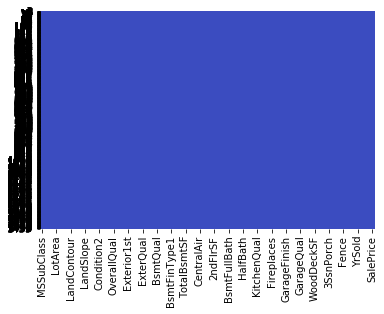

In [9]:
sns.heatmap(df.isnull(), yticklabels = True, cbar = False, cmap = "coolwarm" )

# Handle Categorical Data

In [78]:
one_hot_columns = ["GarageType", "GarageFinish", "GarageQual", "GarageCond", "BsmtFinType1",
                    "Fence",  "MSZoning", "Street", "LotConfig",  "Neighborhood", 
                  "Condition1", "Condition2", "BldgType", "HouseStyle", "RoofStyle", "Exterior1st","Foundation", 
                  "Heating", "CentralAir", "Electrical", "Functional", "PavedDrive",
                    "SaleType", "SaleCondition", "Exterior2nd" ]
label_encoding_cols =  ["LandContour", "Utilities", "LandSlope", "ExterQual", "ExterCond", 
                       "BsmtQual", "BsmtCond", "HeatingQC", "KitchenQual", "FireplaceQu", "GarageQual", "Fence"]


# replace by dummy values

In [79]:
def one_hot_col(df):
    df_temp = df.copy()
    df_enc = pd.DataFrame()
    for i in one_hot_columns:
                df_enc = pd.concat([pd.get_dummies(df_temp[i], prefix = i, drop_first = True), df_enc], axis = 1)
                df_temp.drop([i], axis = 1, inplace = True)
    df_temp = pd.concat([df_temp, df_enc], axis = 1)
    #df is the final encoded value
    return df_temp
        

In [80]:
df_one_hot = one_hot_col(df)


In [81]:
df_one_hot.head(2)

,MSSubClass,LotFrontage,LotArea,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,MasVnrArea,...,GarageQual_TA,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage
0,60,65.0,8450,Reg,Lvl,AllPub,Gtl,7,5,196.0,...,1,0,1,0,1,0,0,0,0,0
1,20,80.0,9600,Reg,Lvl,AllPub,Gtl,6,8,0.0,...,1,0,1,0,1,0,0,0,0,0


# Label encoding

In [82]:
label_encoding_cols =  ["LandContour", "Utilities", "LandSlope", "ExterQual", "ExterCond", 
                       "BsmtQual", "BsmtCond", "HeatingQC", "KitchenQual", "FireplaceQu", "GarageQual",
                       "PoolQC", "Fence", "LotShape", "BsmtExposure"]

In [84]:
df_temp = df_one_hot.copy()
df_temp.replace({"LandContour": {"Lvl" : 3, "Bnk" : 2, "HLS": 1, "Low": 0}}, inplace  = True)
df_temp.replace({"Utilities": {"AllPub" : 3, "NoSewr" : 2, "NoSeWa": 1, "ELO": 0}}, inplace  = True)
df_temp.replace({"LandSlope": {"Gtl" : 3, "Mod" : 2, "Sev": 1}}, inplace  = True)
df_temp.replace({"ExterQual": {"Ex" : 4, "Gd" : 3, "TA": 2, "Fa": 1, "Po": 0}}, inplace  = True)
df_temp.replace({"ExterCond": {"Ex" : 4, "Gd" : 3, "TA": 2, "Fa": 1, "Po": 0}}, inplace  = True)
df_temp.replace({"BsmtQual": {"Ex" : 5, "Gd" : 4, "TA": 3, "Fa": 2, "Po": 1, "No Basement" : 0}}, inplace  = True)
df_temp.replace({"BsmtCond":{"Ex" : 5, "Gd" : 4, "TA": 3, "Fa": 2, "Po": 1, "No Basement" : 0}}, inplace  = True)
df_temp.replace({"HeatingQC": {"Ex" : 4, "Gd" : 3, "TA": 2, "Fa": 1, "Po": 0}}, inplace  = True)
df_temp.replace({"KitchenQual": {"Ex" : 4, "Gd" : 3, "TA": 2, "Fa": 1, "Po": 0}}, inplace  = True)
df_temp.replace({"FireplaceQu": {"Ex" : 4, "Gd" : 3, "TA": 2, "Fa": 1, "Po": 0}}, inplace  = True)
df_temp.replace({"GarageQual": {"Ex" : 5, "Gd" : 4, "TA": 3, "Fa": 2, "Po": 1, "No Garage" : 0}}, inplace  = True)
df_temp.replace({"Fence": {"GdPrv" : 5, "MnPrv" : 4, "GdWo": 3, "MnWw": 2, "NA": 1}}, inplace  = True)
df_temp.replace({"LotShape": {"Reg" : 4, "IR1": 3, "IR2": 2, "IR3": 1}}, inplace  = True)
df_temp.replace({"BsmtExposure": {"Gd" : 4, "Av": 3, "Mn": 2, "No": 1, "No Basement": 0}}, inplace  = True)
df_final = df_temp

In [263]:
df_final.drop(['Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn',
       'Electrical_Mix', 'Exterior1st_ImStucc', 'Exterior1st_Stone',
       'Exterior2nd_Other', 'GarageQual_Fa', 'Heating_GasA',
       'Heating_OthW', 'HouseStyle_2.5Fin'], axis = 1, inplace = True)

In [264]:
df_train = df_final

In [266]:
list(df_train.isnull().sum() > 0) == True
#no null values

False

In [267]:
X = df_train.drop(["SalePrice"], axis =1)
y = df_train[["SalePrice"]]

In [268]:
for i in df_train.columns:
    if(type(df_train.iloc[0][i]) == int):
        df_train[i] = df_train[i].astype(np.int64)

# Hyper Paramter optimziation

### Train test split

In [269]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Building Model

In [270]:
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster = ["gbtree", "gblinear"]
gamma = [0, 0.1, 0.2, 0.3, 0.4]
colsample_bytree = [0.3, 0.4, 0.5, 0.7]
min_child_weights = [1,2,3,4]
# base_score is the initail gloabl score given for all instances 
#the value doest matter if the learning rate and max_depth are optimized well
base_score = [0.25,0.5,0.75,1]
params = {
    "max_depth" : max_depth,
    "n_estimators" : n_estimators, 
    "gamma": gamma,
    "colsample_bytree": colsample_bytree,
    "min_child_weights": min_child_weights, 
    "base_score": base_score,
    "booster" : booster
}

In [271]:
import xgboost
regressor = xgboost.XGBRegressor()

# Random Search 


In [272]:
random_cv = RandomizedSearchCV(estimator = regressor, 
                              param_distributions = params,
                              cv = 5, n_iter = 5, 
                               scoring = "neg_mean_absolute_error", 
                               n_jobs = 4, 
                               verbose = 5, 
                               return_train_score = True, 
                               random_state = 42
                              )

In [273]:
random_cv.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   10.6s
[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:   20.5s finished
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_con...
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree', 'gblinear'],
                                        'colsample_bytree': [0.3, 0.4, 0.5,
      

In [274]:
random_cv.best_estimator_

XGBRegressor(base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0.4, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=2,
             min_child_weight=1, min_child_weights=4, missing=nan,
             monotone_constraints=None, n_estimators=1100, n_jobs=0,
             num_parallel_tree=1, objective='reg:squarederror', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method=None, validate_parameters=False, verbosity=None)

In [275]:
regressor = xgboost.XGBRegressor(base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0.4, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=2,
             min_child_weight=1, min_child_weights=4,
             monotone_constraints=None, n_estimators=1100, n_jobs=0,
             num_parallel_tree=1, objective='reg:squarederror', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method=None, validate_parameters=False, verbosity=None)

In [276]:
regressor.fit(X_train, y_train)

XGBRegressor(base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0.4, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=2,
             min_child_weight=1, min_child_weights=4, missing=nan,
             monotone_constraints=None, n_estimators=1100, n_jobs=0,
             num_parallel_tree=1, objective='reg:squarederror', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method=None, validate_parameters=False, verbosity=None)

In [277]:
y_pred = pd.DataFrame(regressor.predict(X_test))

Finding the RMSE value between y_test and y_pred

In [278]:
def rmsle_func(truths, preds):
    truths = np.asarray(truths)
    preds = np.asarray(preds)
    
    n = len(truths)
    diff = (np.log(preds+1) - np.log(truths+1))**2
    return np.sqrt(np.sum(diff)/n)

In [279]:
rmse_1 = rmsle_func(y_test, y_pred)
print(rmse_1)

0.14850673671662057


# Preparing the Test data


In [280]:
test = pd.read_csv("./test.csv")
df = test.copy()


#filling with null values with mean 
df["LotArea"] = df["LotArea"].fillna(df["LotArea"].mean())
df["LotFrontage"] = df["LotFrontage"].fillna(df["LotFrontage"].mean())
df["MasVnrArea"] = df["MasVnrArea"].fillna(df["MasVnrArea"].mean())
df["BsmtFinSF1"] = df["BsmtFinSF1"].fillna(df["BsmtFinSF1"].mean())
df["BsmtUnfSF"] = df["BsmtUnfSF"].fillna(df["BsmtUnfSF"].mean())

df["TotalBsmtSF"] = df["TotalBsmtSF"].fillna(df["TotalBsmtSF"].mean())
df["GarageCars"] = df["GarageCars"].fillna(df["GarageCars"].mean())
df["GarageArea"] = df["GarageArea"].fillna(df["GarageArea"].mean())





#filling with null values with the most value 
df["BsmtQual"] = df["BsmtQual"].fillna(df["BsmtQual"].mode()[0])
df["BsmtCond"] = df["BsmtCond"].fillna(df["BsmtCond"].mode()[0])
df["Electrical"] = df["Electrical"].fillna(df["Electrical"].mode()[0])
df["MSZoning"] = df["MSZoning"].fillna(df["MSZoning"].mode()[0])
df["Utilities"] = df["Utilities"].fillna(df["Utilities"].mode()[0])
df["Exterior1st"] = df["Exterior1st"].fillna(df["Exterior1st"].mode()[0])
df["Exterior2nd"] = df["Exterior2nd"].fillna(df["Exterior2nd"].mode()[0])

df["BsmtFullBath"] = df["BsmtFullBath"].fillna(df["BsmtFullBath"].mode()[0])
df["BsmtHalfBath"] = df["BsmtHalfBath"].fillna(df["BsmtHalfBath"].mode()[0])


df["FireplaceQu"] = df["FireplaceQu"].fillna(df["FireplaceQu"].mode()[0])
df["KitchenQual"] = df["KitchenQual"].fillna(df["KitchenQual"].mode()[0])
df["Functional"] = df["Functional"].fillna(df["Functional"].mode()[0])
df["SaleType"] = df["SaleType"].fillna(df["SaleType"].mode()[0])


#filling nan values with releveant values
df["GarageType"] = df["GarageType"].fillna("No Garage")
df["GarageFinish"] = df["GarageFinish"].fillna("No Garage")
df["GarageQual"] = df["GarageQual"].fillna("No Garage")
df["GarageCond"] = df["GarageCond"].fillna("No Garage")

df["BsmtExposure"] = df["BsmtExposure"].fillna("No Basement")
df["BsmtFinType1"] = df["BsmtFinType1"].fillna("No Basement")
df["BsmtFinType2"] = df["BsmtFinType2"].fillna("No Basement")


df["Fence"] = df["Fence"].fillna("No Fence")



#droping the columns
df.drop(["GarageYrBlt", "Id", "BsmtFinSF2", "Alley", "MasVnrType", 
         "PoolQC", "YearBuilt", "YearRemodAdd", "RoofMatl", "BsmtFinType2"], inplace = True, axis = 1)
#dropping the columns with threshold of 100 Nan values 
df = df.dropna(thresh = 100, axis = 1)
df_temp = df.copy()

#replace by dummy variables 
def one_hot_col(df):
    test_temp = df.copy()
    test_enc = pd.DataFrame()
    for i in one_hot_columns:
                test_enc = pd.concat([pd.get_dummies(test_temp[i], prefix = i, drop_first = True), test_enc], 
                                     axis = 1)
                test_temp.drop([i], axis = 1, inplace = True)
    test_temp = pd.concat([test_temp, test_enc], axis = 1)
    #df is the final encoded value
    return test_temp

df_one_hot = one_hot_col(df)

        
df_temp = df_one_hot.copy()
df_temp.replace({"LandContour": {"Lvl" : 3, "Bnk" : 2, "HLS": 1, "Low": 0}}, inplace  = True)
df_temp.replace({"Utilities": {"AllPub" : 3, "NoSewr" : 2, "NoSeWa": 1, "ELO": 0}}, inplace  = True)
df_temp.replace({"LandSlope": {"Gtl" : 3, "Mod" : 2, "Sev": 1}}, inplace  = True)
df_temp.replace({"ExterQual": {"Ex" : 4, "Gd" : 3, "TA": 2, "Fa": 1, "Po": 0}}, inplace  = True)
df_temp.replace({"ExterCond": {"Ex" : 4, "Gd" : 3, "TA": 2, "Fa": 1, "Po": 0}}, inplace  = True)
df_temp.replace({"BsmtQual": {"Ex" : 5, "Gd" : 4, "TA": 3, "Fa": 2, "Po": 1, "No Basement" : 0}}, inplace  = True)
df_temp.replace({"BsmtCond":{"Ex" : 5, "Gd" : 4, "TA": 3, "Fa": 2, "Po": 1, "No Basement" : 0}}, inplace  = True)
df_temp.replace({"HeatingQC": {"Ex" : 4, "Gd" : 3, "TA": 2, "Fa": 1, "Po": 0}}, inplace  = True)
df_temp.replace({"KitchenQual": {"Ex" : 4, "Gd" : 3, "TA": 2, "Fa": 1, "Po": 0}}, inplace  = True)
df_temp.replace({"FireplaceQu": {"Ex" : 4, "Gd" : 3, "TA": 2, "Fa": 1, "Po": 0}}, inplace  = True)
df_temp.replace({"GarageQual": {"Ex" : 5, "Gd" : 4, "TA": 3, "Fa": 2, "Po": 1, "No Garage" : 0}}, inplace  = True)
df_temp.replace({"Fence": {"GdPrv" : 5, "MnPrv" : 4, "GdWo": 3, "MnWw": 2, "NA": 1}}, inplace  = True)
df_temp.replace({"LotShape": {"Reg" : 4, "IR1": 3, "IR2": 2, "IR3": 1}}, inplace  = True)
df_temp.replace({"BsmtExposure": {"Gd" : 4, "Av": 3, "Mn": 2, "No": 1, "No Basement": 0}}, inplace  = True)

test_final = df_temp

for i in test_final.columns:
    if(type(test_final.iloc[0][i]) == int):
        test_final[i] = test_final[i].astype(np.int64)
        
X_test_final = test_final.copy()





In [254]:
y_pred = regressor.predict(X_test)

In [281]:
X_test_final

,MSSubClass,LotFrontage,LotArea,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,MasVnrArea,...,GarageQual_TA,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage
0,20,80.0,11622,4,3,3,3,5,6,0.0,...,1,0,0,1,1,0,0,0,0,0
1,20,81.0,14267,3,3,3,3,6,6,108.0,...,1,0,0,1,1,0,0,0,0,0
2,60,74.0,13830,3,3,3,3,5,5,0.0,...,1,0,0,0,1,0,0,0,0,0
3,60,78.0,9978,3,3,3,3,6,6,20.0,...,1,0,0,0,1,0,0,0,0,0
4,120,43.0,5005,3,1,3,3,8,5,0.0,...,1,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,3,3,3,4,7,0.0,...,0,1,0,0,0,0,0,0,0,1
1455,160,21.0,1894,4,3,3,3,4,5,0.0,...,1,0,0,1,0,0,0,1,0,0
1456,20,160.0,20000,4,3,3,3,5,7,0.0,...,1,0,0,1,0,0,0,0,1,0
1457,85,62.0,10441,4,3,3,3,5,5,0.0,...,0,1,0,0,0,0,0,0,0,1


In [282]:
X_train

,MSSubClass,LotFrontage,LotArea,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,MasVnrArea,...,GarageQual_TA,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage
254,20,70.0,8400,4,3,3,3,5,6,0.0,...,1,0,1,0,1,0,0,0,0,0
1066,60,59.0,7837,3,3,3,3,6,7,0.0,...,1,0,1,0,1,0,0,0,0,0
638,30,67.0,8777,4,3,3,3,5,7,0.0,...,0,1,0,0,0,0,0,0,0,1
799,50,60.0,7200,4,3,3,3,5,7,252.0,...,1,0,0,1,0,0,0,0,1,0
380,50,50.0,5000,4,3,3,3,5,6,0.0,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,20,78.0,9317,3,3,3,3,6,5,0.0,...,1,0,1,0,1,0,0,0,0,0
1130,50,65.0,7804,4,3,3,3,4,3,0.0,...,1,0,0,1,0,0,0,0,1,0
1294,20,60.0,8172,4,3,3,3,5,7,0.0,...,1,0,0,1,0,0,0,0,1,0
860,50,55.0,7642,4,3,3,3,7,8,0.0,...,1,0,0,1,0,0,0,0,1,0


In [298]:
Id = [x for x in range(1461, 2920)]

In [299]:
y_test_final = pd.DataFrame({"Id": Id,"SalePrice": regressor.predict(X_test_final)})
y_test_final = y_test_final.reset_index(drop = True)

In [304]:
y_test_final.to_csv("./submission.csv", index = False)

In [302]:
y_test_final 

,Id,SalePrice
0,1461,135734.546875
1,1462,174513.265625
2,1463,197119.031250
3,1464,185205.109375
4,1465,194924.546875
...,...,...
1454,2915,84832.671875
1455,2916,66551.296875
1456,2917,161959.421875
1457,2918,112901.257812
